In [462]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

'''import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import os
print(os.listdir(""))'''

'import plotly.plotly as py\nfrom plotly.offline import init_notebook_mode, iplot\ninit_notebook_mode(connected=True)\nimport plotly.graph_objs as go\nimport os\nprint(os.listdir(""))'

In [463]:
data = pd.read_csv("Heart_data.csv")

In [464]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1
302,38,1,2,138,175,0,0,173,0,0.0,0,0,1,0


In [465]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [466]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1
302,38,1,2,138,175,0,0,173,0,0.0,0,0,1,0


In [467]:
A = data[data.target == 1]
B = data[data.target == 0]

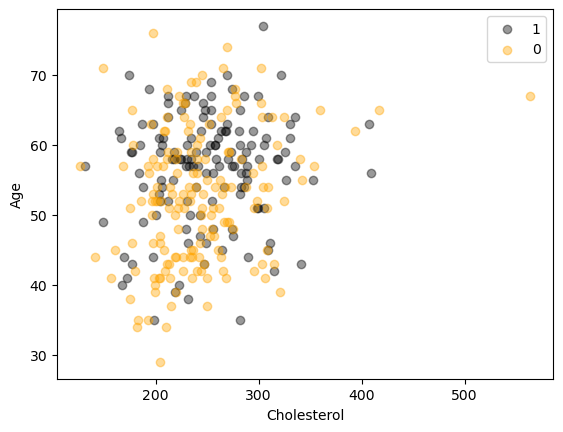

In [468]:
plt.scatter(A.chol,A.age,color = "Black",label="1",alpha=0.4)
plt.scatter(B.chol,B.age,color = "Orange",label="0",alpha=0.4)
plt.xlabel("Cholesterol")
plt.ylabel("Age")
plt.legend()
plt.show()

In [469]:
#Seperate data
y =data.target.values
x1=data.drop(["target"],axis=1)

In [470]:
#Normalization 
x = (x1 - x1.min()) / (x1.max() - x1.min())

In [471]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [472]:
xtrain = xtrain.T
xtest = xtest.T
ytrain = ytrain.T
ytest = ytest.T


In [473]:
# xtrain

### Multinomial Naive Bayes

In [474]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [475]:
%time nb.fit(xtrain.T, ytrain.T)

CPU times: total: 0 ns
Wall time: 4 ms


MultinomialNB()

In [476]:
ypred = nb.predict(xtest.T)

In [477]:
from sklearn import metrics
metrics.accuracy_score(ytest.T, ypred)

0.8852459016393442

In [478]:
con_metrics_nb = metrics.confusion_matrix(ytest.T, ypred)
con_metrics_nb

array([[28,  1],
       [ 6, 26]], dtype=int64)

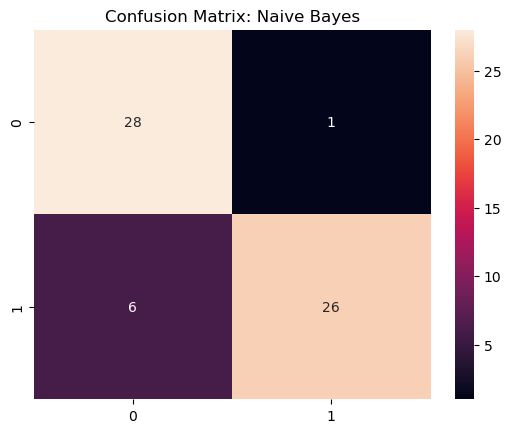

In [479]:
#ploting heatmap for confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(con_metrics_nb, annot=True, fmt='d')
plt.title("Confusion Matrix: Naive Bayes")
plt.show()

In [480]:
#Checking Precision, Recall and F1 Score
print(metrics.classification_report(ytest.T, ypred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        29
           1       0.96      0.81      0.88        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.88        61



In [481]:
# calculate AUC - Method 1
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(ytest.T, ypred)
print(metrics.auc(false_positive_rate, true_positive_rate))

0.8890086206896551


In [482]:
# calculate AUC _ Method 2
auc_nb = metrics.roc_auc_score(ytest.T, ypred)
print(auc_nb)

0.8890086206896551


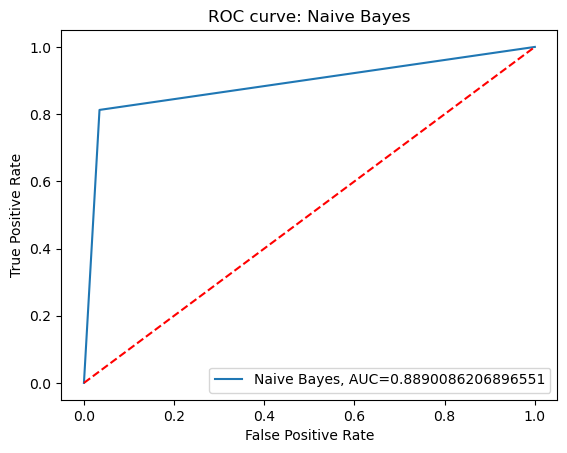

In [483]:
#Plotting Area Under the Curve
plt.plot(false_positive_rate,true_positive_rate,label="Naive Bayes, AUC="+str(auc_nb))
plt.plot([0,1],[0,1],'r--')
plt.title('ROC curve: Naive Bayes')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [484]:
#Calculating Log-Loss
metrics.log_loss(ytest.T, ypred)

4.136156946292132

In [485]:
metrics.mean_absolute_error(ytest.T, ypred)

0.11475409836065574

### Logistic Regression with L2 Regularizor

In [486]:
from sklearn.linear_model import LogisticRegression
logreg_l2 = LogisticRegression()

In [487]:
# train the model using X_train_dtm
%time logreg_l2.fit(xtrain.T, ytrain.T)

CPU times: total: 0 ns
Wall time: 9.56 ms


LogisticRegression()

In [488]:
# make class predictions for X_test_dtm
ypred= logreg_l2.predict(xtest.T)

In [489]:
from sklearn import metrics
metrics.accuracy_score(ytest.T, ypred)

0.8852459016393442

In [490]:
con_metrics_nb = metrics.confusion_matrix(ytest.T, ypred)
con_metrics_nb

array([[25,  4],
       [ 3, 29]], dtype=int64)

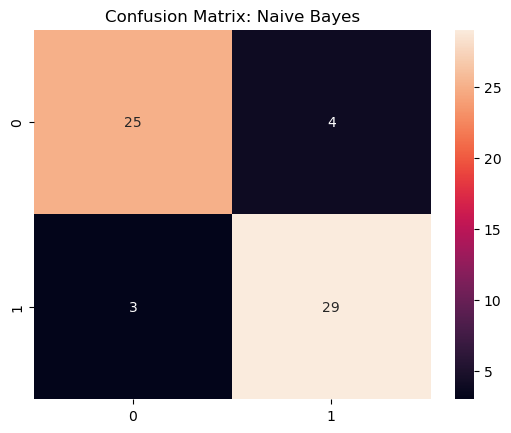

In [491]:
#ploting heatmap for confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(con_metrics_nb, annot=True, fmt='d')
plt.title("Confusion Matrix: Naive Bayes")
plt.show()

In [492]:
#Checking Precision, Recall and F1 Score
print(metrics.classification_report(ytest.T, ypred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [493]:
# calculate AUC - Method 1
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(ytest.T, ypred)
print(metrics.auc(false_positive_rate, true_positive_rate))

0.8841594827586207


In [494]:
# calculate AUC _ Method 2
auc_nb = metrics.roc_auc_score(ytest.T, ypred)
print(auc_nb)

0.8841594827586207


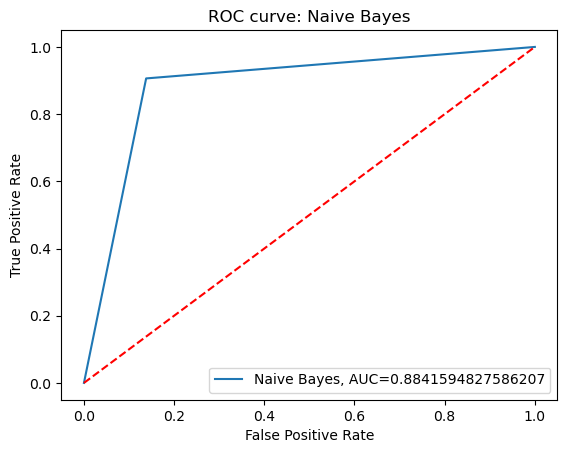

In [495]:
#Plotting Area Under the Curve
plt.plot(false_positive_rate,true_positive_rate,label="Naive Bayes, AUC="+str(auc_nb))
plt.plot([0,1],[0,1],'r--')
plt.title('ROC curve: Naive Bayes')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [496]:
#Calculating Log-Loss
metrics.log_loss(ytest.T, ypred)

4.136156946292132

In [497]:
metrics.mean_absolute_error(ytest.T, ypred)

0.11475409836065574

### Logistic Regression with L1 Regularizor

In [498]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear')

In [499]:
# train the model using X_train_dtm
%time logreg_l1.fit(xtrain.T, ytrain.T)

CPU times: total: 0 ns
Wall time: 6.53 ms


LogisticRegression(penalty='l1', solver='liblinear')

In [500]:
# make class predictions for X_test_dtm
ypred= logreg_l1.predict(xtest.T)

In [501]:
from sklearn import metrics
metrics.accuracy_score(ytest.T, ypred)

0.9180327868852459

In [502]:
con_metrics_nb = metrics.confusion_matrix(ytest.T, ypred)
con_metrics_nb

array([[27,  2],
       [ 3, 29]], dtype=int64)

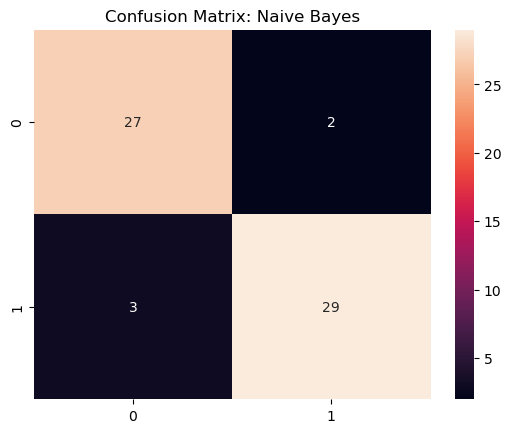

In [503]:
#ploting heatmap for confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(con_metrics_nb, annot=True, fmt='d')
plt.title("Confusion Matrix: Naive Bayes")
plt.show()

In [504]:
#Checking Precision, Recall and F1 Score
print(metrics.classification_report(ytest.T, ypred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [505]:
# calculate AUC - Method 1
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(ytest.T, ypred)
print(metrics.auc(false_positive_rate, true_positive_rate))

0.9186422413793103


In [506]:
# calculate AUC _ Method 2
auc_nb = metrics.roc_auc_score(ytest.T, ypred)
print(auc_nb)

0.9186422413793103


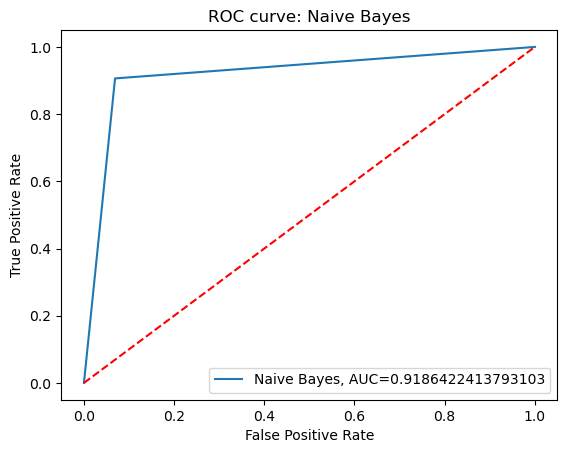

In [507]:
#Plotting Area Under the Curve
plt.plot(false_positive_rate,true_positive_rate,label="Naive Bayes, AUC="+str(auc_nb))
plt.plot([0,1],[0,1],'r--')
plt.title('ROC curve: Naive Bayes')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [508]:
#Calculating Log-Loss
metrics.log_loss(ytest.T, ypred)

2.954397818780094

In [509]:
metrics.mean_absolute_error(ytest.T, ypred)

0.08196721311475409

### Support Vector Machines: Linear SVC

In [510]:
# import and instantiate a Linear SVM model
from sklearn import svm
lrsvc = svm.LinearSVC()
# train the model using X_train_dtm
%time lrsvc.fit(xtrain.T, ytrain.T)

CPU times: total: 0 ns
Wall time: 3 ms


LinearSVC()

In [511]:
# make class predictions for X_test_dtm
ypred= lrsvc.predict(xtest.T)

In [512]:
from sklearn import metrics
metrics.accuracy_score(ytest.T, ypred)

0.8852459016393442

In [513]:
con_metrics_nb = metrics.confusion_matrix(ytest.T, ypred)
con_metrics_nb

array([[25,  4],
       [ 3, 29]], dtype=int64)

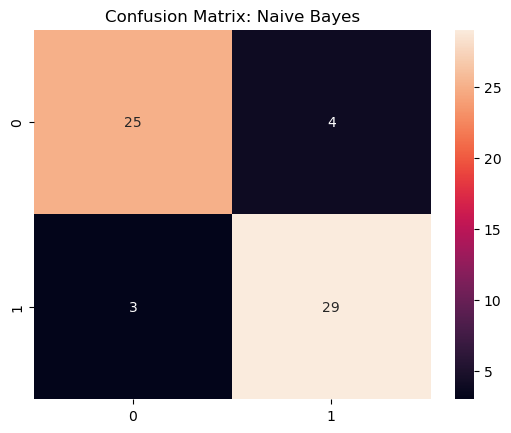

In [514]:
#ploting heatmap for confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(con_metrics_nb, annot=True, fmt='d')
plt.title("Confusion Matrix: Naive Bayes")
plt.show()

In [515]:
#Checking Precision, Recall and F1 Score
print(metrics.classification_report(ytest.T, ypred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [516]:
# calculate AUC - Method 1
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(ytest.T, ypred)
print(metrics.auc(false_positive_rate, true_positive_rate))

0.8841594827586207


In [517]:
# calculate AUC _ Method 2
auc_nb = metrics.roc_auc_score(ytest.T, ypred)
print(auc_nb)

0.8841594827586207


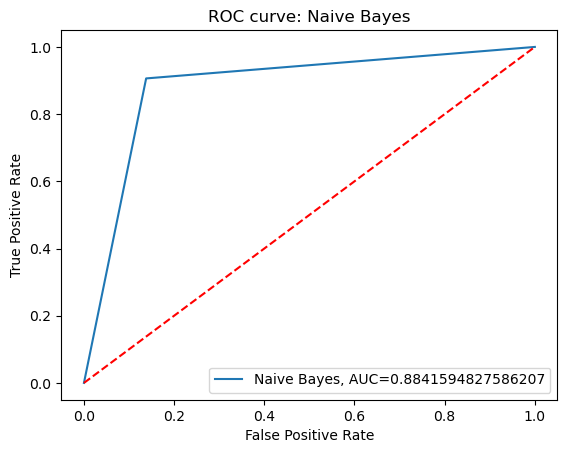

In [518]:
#Plotting Area Under the Curve
plt.plot(false_positive_rate,true_positive_rate,label="Naive Bayes, AUC="+str(auc_nb))
plt.plot([0,1],[0,1],'r--')
plt.title('ROC curve: Naive Bayes')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [519]:
#Calculating Log-Loss
metrics.log_loss(ytest.T, ypred)

4.136156946292132

In [520]:
metrics.mean_absolute_error(ytest.T, ypred)

0.11475409836065574

### Support Vector Machines: RBF Kernel SVC

In [521]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier

rbf_feature = RBFSampler(gamma=1, random_state=1)
X_features = rbf_feature.fit_transform(xtrain.T)
clf = SGDClassifier()   
clf.fit(X_features, ytrain.T)

SGDClassifier()

In [522]:
test_feature = rbf_feature.transform(xtest.T)

In [523]:
ypred = clf.predict(test_feature)

In [524]:
# calculate accuracy
metrics.accuracy_score(ytest.T,ypred)

0.7049180327868853

In [525]:
con_metrics_nb = metrics.confusion_matrix(ytest.T, ypred)
con_metrics_nb

array([[16, 13],
       [ 5, 27]], dtype=int64)

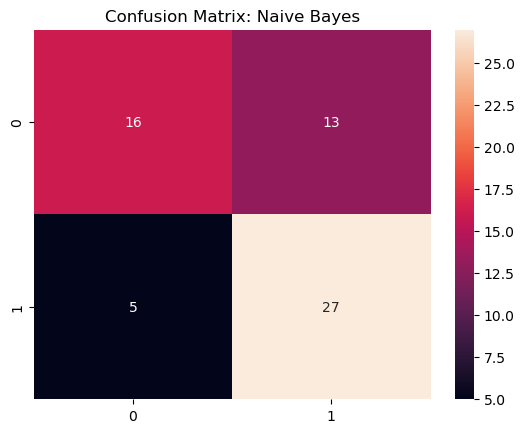

In [526]:
#ploting heatmap for confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(con_metrics_nb, annot=True, fmt='d')
plt.title("Confusion Matrix: Naive Bayes")
plt.show()

In [527]:
#Checking Precision, Recall and F1 Score
print(metrics.classification_report(ytest.T, ypred))

              precision    recall  f1-score   support

           0       0.76      0.55      0.64        29
           1       0.68      0.84      0.75        32

    accuracy                           0.70        61
   macro avg       0.72      0.70      0.70        61
weighted avg       0.72      0.70      0.70        61



In [528]:
# calculate AUC - Method 1
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(ytest.T, ypred)
print(metrics.auc(false_positive_rate, true_positive_rate))

0.6977370689655172


In [529]:
# calculate AUC _ Method 2
auc_nb = metrics.roc_auc_score(ytest.T, ypred)
print(auc_nb)

0.6977370689655172


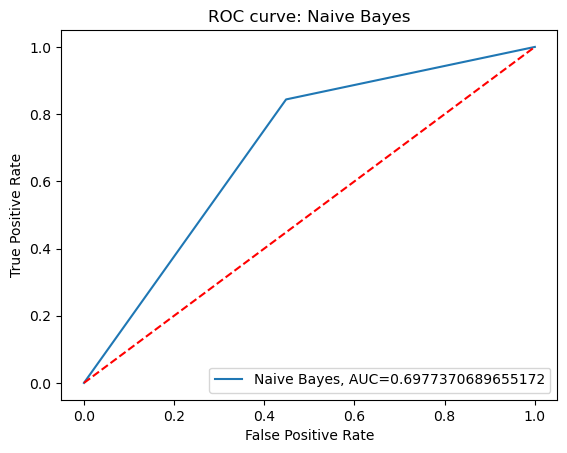

In [530]:
#Plotting Area Under the Curve
plt.plot(false_positive_rate,true_positive_rate,label="Naive Bayes, AUC="+str(auc_nb))
plt.plot([0,1],[0,1],'r--')
plt.title('ROC curve: Naive Bayes')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [531]:
#Calculating Log-Loss
metrics.log_loss(ytest.T, ypred)

10.63583214760834

In [532]:
metrics.mean_absolute_error(ytest.T, ypred)

0.29508196721311475

### KNN-model

In [533]:
from sklearn.neighbors import KNeighborsClassifier
KNNfind = KNeighborsClassifier(n_neighbors = 24) #n_neighbors = K value
KNNfind.fit(xtrain.T,ytrain.T) #learning model
prediction = KNNfind.predict(xtest.T)
print("{}-NN Score: {}".format(25,KNNfind.score(xtest.T,ytest.T)))
KNNscore = KNNfind.score(xtest.T,ytest.T)

25-NN Score: 0.8524590163934426


In [534]:
ypred= KNNfind.predict(xtest.T)

In [535]:
metrics.log_loss(ytest.T, ypred)

5.31791607380417

# SVM with Sklearn

In [536]:

from sklearn.svm import SVC

SVM = SVC(random_state=42, probability=True)
SVM.fit(xtrain.T,ytrain.T)  #learning 
#SVM Test 
print ("SVM Accuracy:", SVM.score(xtest.T,ytest.T))

SVMscore = SVM.score(xtest.T,ytest.T)

SVM Accuracy: 0.9180327868852459


In [537]:
ypred= SVM.predict(xtest.T)

In [538]:
metrics.log_loss(ytest.T, ypred)

2.954397818780094

# Decision tree

In [539]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=2)
DTC.fit(xtrain.T,ytrain.T) #learning
#prediciton
print("Decision Tree Score: ",DTC.score(xtest.T,ytest.T))
DTCscore = DTC.score(xtest.T,ytest.T)

Decision Tree Score:  0.7213114754098361


In [540]:
ypred= DTC.predict(xtest.T)

In [541]:
metrics.log_loss(ytest.T, ypred)

10.04495258385232

# random forest classifier

In [542]:
from sklearn.ensemble import RandomForestClassifier
RFfind= RandomForestClassifier(n_estimators = 24, random_state=5) #n_estimator = DT
RFfind.fit(xtrain.T,ytrain.T) # learning
print("Random Forest Score: ",RFfind.score(xtest.T,ytest.T))
RFCscore=RFfind.score(xtest.T,ytest.T)

Random Forest Score:  0.8688524590163934


In [543]:
ypred= RFfind.predict(xtest.T)

In [544]:
metrics.log_loss(ytest.T, ypred)

4.727036510048151

# xgboost classifier

In [545]:
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
xgb_clf = XGBClassifier(max_depth=5)
xgb_clf.fit(xtrain.T,ytrain.T)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [546]:
print("XG-BOOST Score: ",xgb_clf.score(xtest.T,ytest.T))
xgb_clfscore=xgb_clf.score(xtest.T,ytest.T)

XG-BOOST Score:  0.8032786885245902


In [547]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
        'silent': [False],
        'max_depth': [4,5],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100]}

fit_params = {'eval_metric': 'logloss',
              'early_stopping_rounds': 10,
              'eval_set': [(xtrain.T, ytrain.T)]}

clf = xgb.XGBClassifier()

In [548]:
rs_clf = RandomizedSearchCV(clf, param_grid, n_iter=20,
                            n_jobs=-1, verbose=2, cv=2,
                            scoring='neg_log_loss', refit=False, random_state=42)

In [549]:
rs_clf.fit(xtrain.T, ytrain.T)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


RandomizedSearchCV(cv=2,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                        'colsample_bytree': [0.4, 0.5, 0.6, 0.7,
                                                             0.8, 0.9, 1.0],
                                        'gamma': [0, 0.25, 0.5, 1.0],
                                        'learning_rate': [0.001, 0.01, 0.1, 0.2,
                                                          0, 3],
                                        'max_depth': [4, 5],
                                        'min_child_weight': [0.5, 1.0, 3.0, 5.0,
                                                             7.0, 10.0],
                                        'n_estimators': [100],
                                        'reg_lambda': [0.1, 1.0, 5.0, 10.0,
                                                       50.0, 100.0],
                                        'silent': [False],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1.0]},
                   random_state=42, refit=False, scoring='neg_log_loss',
                   verbose=2)

In [550]:
best_score = rs_clf.best_score_
best_params = rs_clf.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Best score: -0.42913576100613615
Best params: 
colsample_bylevel: 0.9
colsample_bytree: 0.5
gamma: 0
learning_rate: 0.2
max_depth: 5
min_child_weight: 5.0
n_estimators: 100
reg_lambda: 0.1
silent: False
subsample: 0.8


In [551]:
clf=xgb.XGBClassifier(gamma=0.25,learning_rate=0.3,max_depth=5,n_estimators=100,reg_lambda=0.1,silent=False,subsample=0.8,
                      colsample_bylevel=0.9,colsample_bytree=0.1,min_child_weight=3) 
clf.fit(xtrain.T,ytrain.T)

c:\Users\Admin\miniconda3\envs\ml_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:49:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "silent" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=None,
              colsample_bytree=0.1, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.25, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [552]:
print("XG-BOOST Score: ",xgb_clf.score(xtest.T,ytest.T))
clfscore=clf.score(xtest.T,ytest.T)

XG-BOOST Score:  0.8032786885245902


In [553]:
ypred1= clf.predict(xtest.T)

In [554]:
metrics.log_loss(ytest.T, ypred1)

4.136156946292132

# svm

In [555]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow

In [556]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(xtrain.T, ytrain.T)
    svc_scores.append(svc_classifier.score(xtrain.T, ytrain.T))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

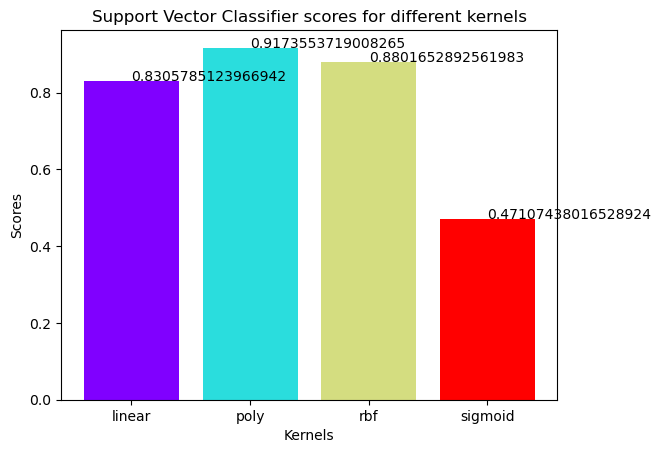

In [557]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [558]:
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[2]*100, 'rbf'))

The score for Support Vector Classifier is 88.01652892561982% with rbf kernel.


In [559]:
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear','sigmoid', 'rbf'), 'C':[0.01,0.1,1,10], 'gamma':[0.01,0.1,1,10,100]}
#svr = svm.SVC()
grid = GridSearchCV(estimator=svc_classifier, param_grid=parameters,n_jobs=-1)
grid.fit(xtrain.T, ytrain.T)
print (grid.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [560]:
sv=SVC(kernel='linear',gamma=0.01,C=1,probability=True)

In [561]:
score=sv.fit(xtrain.T,ytrain.T)
score

SVC(C=1, gamma=0.01, kernel='linear', probability=True)

In [562]:
print(sv.fit(xtrain.T,ytrain.T))
print(sv.score(xtest.T,ytest.T))

SVC(C=1, gamma=0.01, kernel='linear', probability=True)
0.9016393442622951


In [ ]:
from sklearn.metrics import log_loss
clf_probs = sv.predict(xtest.T)
score = log_loss(ytest.T, clf_probs)
print(score)

3.545277382536113


# lightgbm

In [564]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l2', 
                        n_estimators = 20, num_leaves = 38)


param_grid = {
    'n_estimators': [x for x in range(20, 150, 2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
gridsearch = GridSearchCV(estimator, param_grid)
grid = GridSearchCV(estimator=estimator, param_grid=param_grid,n_jobs=-1)
grid.fit(xtrain.T, ytrain.T)
print (grid.best_params_)

[LightGBM] [Info] Number of positive: 107, number of negative: 135
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.442149 -> initscore=-0.232446
[LightGBM] [Info] Start training from score -0.232446
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [565]:
estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 28, num_leaves = 38)
estimator.fit(xtrain.T,ytrain.T)
print(estimator.score(xtest.T,ytest.T))

[LightGBM] [Info] Number of positive: 107, number of negative: 135
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.442149 -> initscore=-0.232446
[LightGBM] [Info] Start training from score -0.232446
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [566]:
ypred1= estimator.predict(xtest.T)

In [567]:
metrics.log_loss(ytest,ypred1)

4.136156946292132

In [670]:
from sklearn.metrics import log_loss
clf_probs = estimator.predict_proba(xtest.T)
score = log_loss(ytest.T, clf_probs)
print(score)

0.303129593819342


## Stacking classifier

In [620]:
from sklearn import model_selection
#from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB 
#from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np

#clf1 = KNeighborsClassifier(n_neighbors=1)
#clf2 = RandomForestClassifier(random_state=1)
#clf3 = GaussianNB()
#lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[estimator, SVM, sv], 
                          meta_classifier=logreg_l1)



In [570]:
from sklearn import model_selection
#from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB 
#from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np

#clf1 = KNeighborsClassifier(n_neighbors=1)
#clf2 = RandomForestClassifier(random_state=1)
#clf3 = GaussianNB()
#lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf, RFfind], 
                          meta_classifier=estimator)



In [621]:
sclf.fit(xtrain.T,ytrain.T)

[LightGBM] [Info] Number of positive: 107, number of negative: 135
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.442149 -> initscore=-0.232446
[LightGBM] [Info] Start training from score -0.232446
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

StackingClassifier(classifiers=[LGBMClassifier(learning_rate=0.125, metric='l1',
                                               n_estimators=28, num_leaves=38),
                                SVC(probability=True, random_state=42),
                                SVC(C=1, gamma=0.01, kernel='linear',
                                    probability=True)],
                   meta_classifier=LogisticRegression(penalty='l1',
                                                      solver='liblinear'))

In [622]:
print(sclf.score(xtest.T,ytest.T))

0.8852459016393442


In [573]:
print(sclf.score(xtrain.T,ytrain.T))

1.0


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [574]:
from sklearn.metrics import log_loss
clf_probs = sclf.predict_proba(xtest.T)
score = log_loss(ytest.T, clf_probs)
print(score)

0.5763850419046318


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


### voting classifier

In [665]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
#model6 = SVC(kernel='rbf',gamma=0.01,C=10,probability=True)
#model7 = xgb.XGBClassifier(max_depth=4,learning_rate=0.3,objective='binary:logistic',min_child_weight=3.0,n_estimators= 100,
                       # subsample=0.9,colsample_bytree = 0.6,colsample_bylevel = 0.9,gamma=0.25)
#model8=RandomForestClassifier(n_estimators=1500,criterion='gini',max_features='log2',max_depth=4)
model = VotingClassifier(estimators=[('logistic',logreg_l1),('svm',SVM),('lightgbm',estimator)], voting='hard')
#model6.fit(X_train,y_train)
model.fit(xtrain.T,ytrain.T)
#model.score(X_train,y_train)
#model.score(X_test,y_test)
#pred1=model6.predict_proba(test)
#pred2=model7.predict_proba(test)
#y_pred_proba_sv=(pred1+pred2)/2

[LightGBM] [Info] Number of positive: 107, number of negative: 135
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.442149 -> initscore=-0.232446
[LightGBM] [Info] Start training from score -0.232446
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear')),
                             ('svm', SVC(probability=True, random_state=42)),
                             ('lightgbm',
                              LGBMClassifier(learning_rate=0.125, metric='l1',
                                             n_estimators=28, num_leaves=38))])

In [666]:
print(model.score(xtest.T,ytest.T))

0.9344262295081968


In [598]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
#model6 = SVC(kernel='rbf',gamma=0.01,C=10,probability=True)
#model7 = xgb.XGBClassifier(max_depth=4,learning_rate=0.3,objective='binary:logistic',min_child_weight=3.0,n_estimators= 100,
                       # subsample=0.9,colsample_bytree = 0.6,colsample_bylevel = 0.9,gamma=0.25)
#model8=RandomForestClassifier(n_estimators=1500,criterion='gini',max_features='log2',max_depth=4)
model = VotingClassifier(estimators=[ ('randomforest', RFfind),('lightgbm',estimator),('svm',SVM)], voting='soft')
#model6.fit(X_train,y_train)
model.fit(xtrain.T,ytrain.T)
#model.score(X_train,y_train)
#model.score(X_test,y_test)
#pred1=model6.predict_proba(test)
#pred2=model7.predict_proba(test)
#y_pred_proba_sv=(pred1+pred2)/2

[LightGBM] [Info] Number of positive: 107, number of negative: 135
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.442149 -> initscore=-0.232446
[LightGBM] [Info] Start training from score -0.232446
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

VotingClassifier(estimators=[('randomforest',
                              RandomForestClassifier(n_estimators=24,
                                                     random_state=5)),
                             ('lightgbm',
                              LGBMClassifier(learning_rate=0.125, metric='l1',
                                             n_estimators=28, num_leaves=38)),
                             ('svm', SVC(probability=True, random_state=42))],
                 voting='soft')

In [599]:
print(model.score(xtest.T,ytest.T))

0.9016393442622951


In [667]:
from sklearn.metrics import log_loss
clf_probs = model.predict(xtest.T)
score = log_loss(ytest.T, clf_probs)
print(score)

2.3635182550240756


### Catboost classifier

In [589]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
           'depth': [3,1,2,6,4,5,7,8,9,10],
          'iterations': [250,100,500,1000],
          'learning_rate' : [0.03,0.001,0.01,0.1,0.2,0.3], 
          'l2_leaf_reg' : [3,1,5,10,100],
          'border_count' : [32,5,10,20,50,100,200],
        #   'ctr_border_count': [50,5,10,20,100,200],
          'thread_count': [4] }

fit_paramaters = {
              'early_stopping_rounds': 10,
              'eval_set': [(xtrain.T, ytrain.T)],
              'verbose': 0}



clf1 = CatBoostClassifier(verbose=0, random_state=42)

In [590]:
rs_clf = RandomizedSearchCV(
    estimator=clf1,
    param_distributions=param_grid,
    n_iter=20,
    n_jobs=-1,
    verbose=2,
    cv=2,
    scoring='neg_log_loss',
    refit=False,
    error_score='raise',
    random_state=42
)

In [591]:
rs_clf = RandomizedSearchCV(clf1, param_grid, n_iter=20,
                            n_jobs=-1, verbose=2, cv=2,
                            scoring='neg_log_loss', refit=False, random_state=42)

In [592]:
rs_clf.fit(xtrain.T, ytrain.T)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


RandomizedSearchCV(cv=2,
                   estimator=<catboost.core.CatBoostClassifier object at 0x00000233F16252E0>,
                   n_iter=20, n_jobs=-1,
                   param_distributions={'border_count': [32, 5, 10, 20, 50, 100,
                                                         200],
                                        'depth': [3, 1, 2, 6, 4, 5, 7, 8, 9,
                                                  10],
                                        'iterations': [250, 100, 500, 1000],
                                        'l2_leaf_reg': [3, 1, 5, 10, 100],
                                        'learning_rate': [0.03, 0.001, 0.01,
                                                          0.1, 0.2, 0.3],
                                        'thread_count': [4]},
                   random_state=42, refit=False, scoring='neg_log_loss',
                   verbose=2)

In [593]:
best_params = rs_clf.best_params_

In [594]:
from catboost import CatBoostClassifier

final_model = CatBoostClassifier(**best_params, verbose=0)
final_model.fit(xtrain.T, ytrain.T)


In [595]:
from sklearn.metrics import accuracy_score, log_loss

y_pred = final_model.predict(xtest.T)
y_proba = final_model.predict_proba(xtest.T)

print("Accuracy:", accuracy_score(ytest.T, y_pred))
print("Log Loss:", log_loss(ytest.T, y_proba))


Accuracy: 0.8688524590163934
Log Loss: 0.2936189050903719


In [596]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(final_model, x, y, cv=cv, scoring='accuracy')
print("CV Mean Accuracy:", scores.mean())

CV Mean Accuracy: 0.8283060109289616


In [661]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Base learners with scaling
svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True, kernel='linear'))
])

linear_svc_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('linsvc', LinearSVC(max_iter=10000))
])

# RandomForest doesn't need scaling
rf = RandomForestClassifier(random_state=42)

# Meta learner
meta_model = LogisticRegression()

# Create the stacking classifier
stacking_model = StackingClassifier(
    estimators=[
        ('svm', sv),
        ('sv', logreg_l1),
        ('linsvc', linear_svc_pipe)
    ],
    final_estimator=clf1,
    cv=5,
    passthrough=False  # If you want original features passed to meta-learner, set to True
)

# Fit model
stacking_model.fit(X_train, y_train)

# Predict
y_pred = stacking_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("StackingClassifier Accuracy:", accuracy)


StackingClassifier Accuracy: 0.9016393442622951


In [662]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
#model6 = SVC(kernel='rbf',gamma=0.01,C=10,probability=True)
#model7 = xgb.XGBClassifier(max_depth=4,learning_rate=0.3,objective='binary:logistic',min_child_weight=3.0,n_estimators= 100,
                       # subsample=0.9,colsample_bytree = 0.6,colsample_bylevel = 0.9,gamma=0.25)
#model8=RandomForestClassifier(n_estimators=1500,criterion='gini',max_features='log2',max_depth=4)
model = VotingClassifier(estimators=[('logistic',logreg_l1),('svm',SVM),('lightgbm',estimator),('stack', stacking_model)], voting='hard')
#model6.fit(X_train,y_train)
model.fit(xtrain.T,ytrain.T)
#model.score(X_train,y_train)
#model.score(X_test,y_test)
#pred1=model6.predict_proba(test)
#pred2=model7.predict_proba(test)
#y_pred_proba_sv=(pred1+pred2)/2

[LightGBM] [Info] Number of positive: 107, number of negative: 135
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.442149 -> initscore=-0.232446
[LightGBM] [Info] Start training from score -0.232446
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear')),
                             ('svm', SVC(probability=True, random_state=42)),
                             ('lightgbm',
                              LGBMClassifier(learning_rate=0.125, metric='l1',
                                             n_estimators=28, num_leaves=38)),
                             ('stack',
                              StackingClassifier(cv=5,
                                                 estimators=[('svm',
                                                              SVC(C=1,
                                                                  gamma=0.01,
                                                                  kernel='linear',
                                                                  probability=True)),
                                                             ('sv',
                                                              LogisticRegression(penalty='l1',
                                                                                 solver='liblinear')),
                                                             ('linsvc',
                                                              Pipeline(steps=[('scaler',
                                                                               StandardScaler()),
                                                                              ('linsvc',
                                                                               LinearSVC(max_iter=10000))]))],
                                                 final_estimator=<catboost.core.CatBoostClassifier object at 0x00000233F16252E0>))])

In [663]:
print(model.score(xtest.T,ytest.T))

0.9344262295081968


In [664]:
from sklearn.metrics import log_loss
clf_probs = model.predict(xtest.T)
score = log_loss(ytest.T, clf_probs)
print(score)

2.3635182550240756
